<a href="https://colab.research.google.com/github/hadilbelhadjhassin/gomycode/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

 

In [24]:
data=pd.read_csv("kc_house_data.csv")

In [25]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [26]:
dell=["id","date","zipcode"]
data=data.drop(dell,axis=1)


In [27]:
data["yr_built"].describe()
data["age"]=2022-data["yr_built"]
data["age"].describe()
#data=data[(data["age"]>=10)]
data=data.drop("yr_built",axis=1)
data1=data.copy()
for i in range(0,21613):
  if(data1["yr_renovated"][i]>0):
    data1["yr_renovated"][i]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [28]:
x=data["bathrooms"].values[:,np.newaxis]
y=data["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


MSE 89550909069.11131
R squared 0.2876816096127013


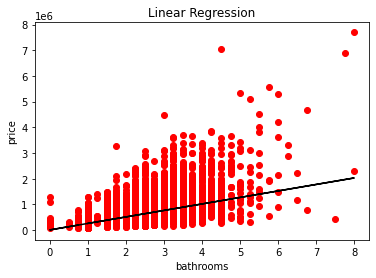

In [30]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("bathrooms")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [31]:
colmn=list(data1.columns)

feature= list(set(colmn)-set(["price"])) 

y1=data1["price"].values 
x1=data1[feature].values

y1=np.log(y1)


In [32]:
from  sklearn.preprocessing import StandardScaler
sn= StandardScaler();
x1=sn.fit_transform(x1)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import  mean_squared_error
train_x,test_x,train_y,test_y= train_test_split(x1,y1,test_size=0.3,random_state=0)

In [33]:
lr=LinearRegression()
model=lr.fit(train_x,train_y)
predicted=lr.predict(test_x)
print("MSE", mean_squared_error(test_y,predicted))
print("R squared", metrics.r2_score(test_y,predicted))

MSE 0.06328055693677928
R squared 0.7704353297504456


In [37]:
# the performance of multi-linear regression is better than  the linear model.(R squard:0.77>0.28 and MSE ((multi_linear regression)<<<< MSE(linear regression) ) 


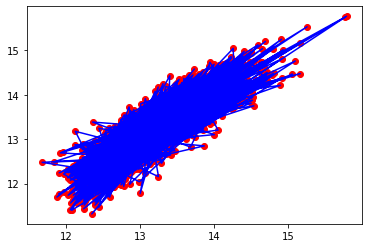

In [34]:
import matplotlib.pyplot as plt

plt.scatter(predicted, test_y, color = 'red')
plt.plot(predicted, test_y, color = 'blue')
plt.show()

 

In [35]:
from sklearn.preprocessing import PolynomialFeatures 
poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(train_x) #transforming our input data
lr.fit(x_train_fit, train_y)
x_test_ = poly.fit_transform(test_x)
predicted = lr.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(test_y, predicted))
print("R squared: ", metrics.r2_score(test_y,predicted))


MSE:  0.05106965139561309
R squared:  0.8147331779316305


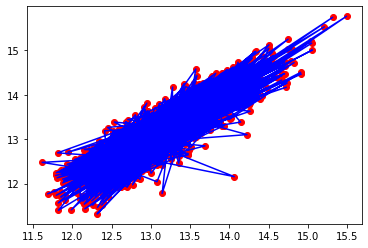

In [36]:
plt.scatter(predicted, test_y, color = 'red')
plt.plot(predicted, test_y, color = 'blue')
plt.show()

In [39]:
#the performance Polynomial regression gives better result than multi linear regression(0.8>0.7 and 0.05<0.06)